In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from few_shot import *

In [3]:
result = pd.read_csv('./result.csv')

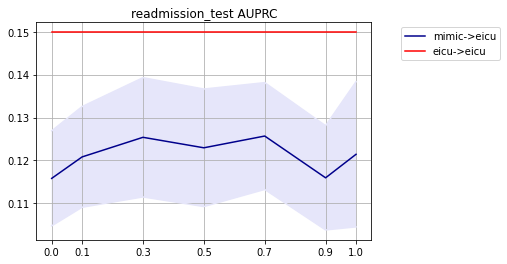

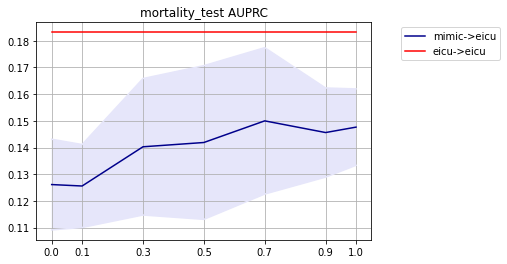

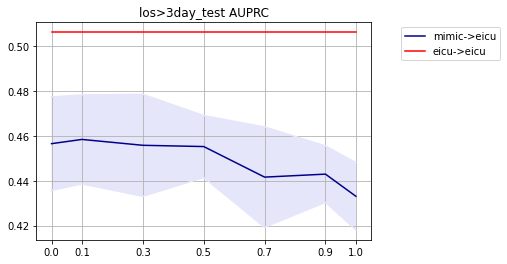

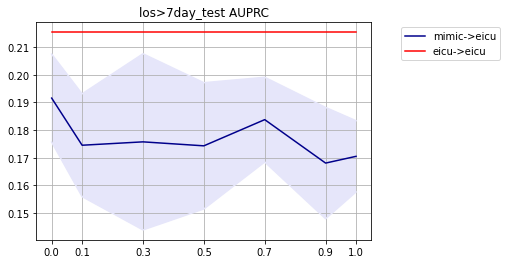

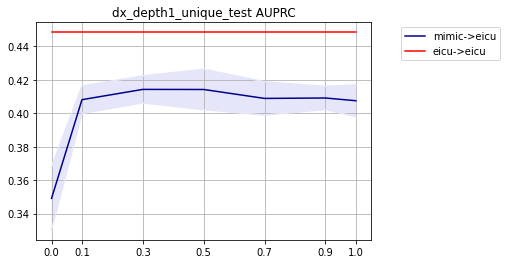

In [4]:
visualize_fewshot(result, 'mimic', 'eicu', 'bio_bert', 'lab', True)

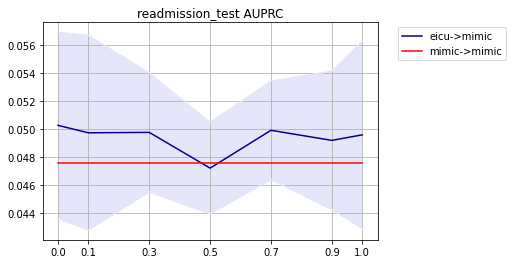

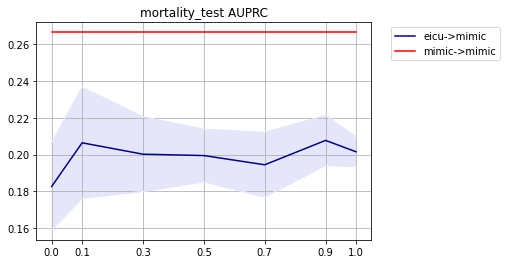

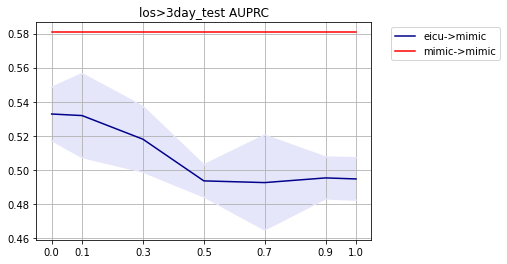

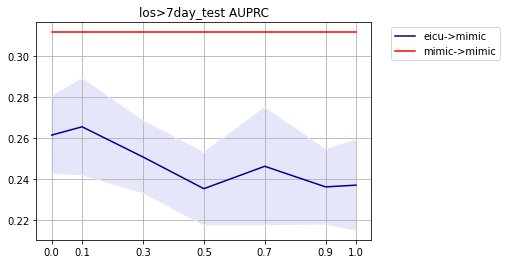

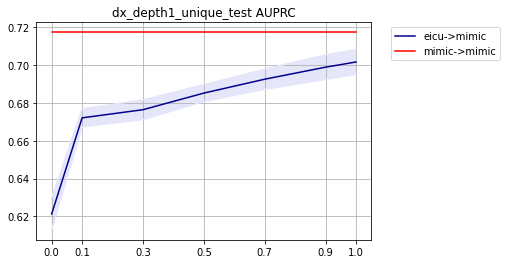

In [5]:
visualize_fewshot(result, 'eicu', 'mimic', 'bio_bert', 'lab', True)

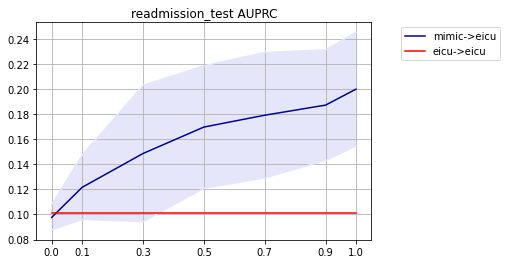

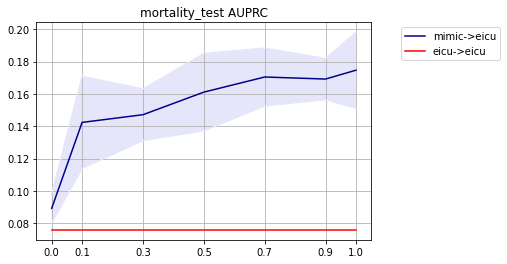

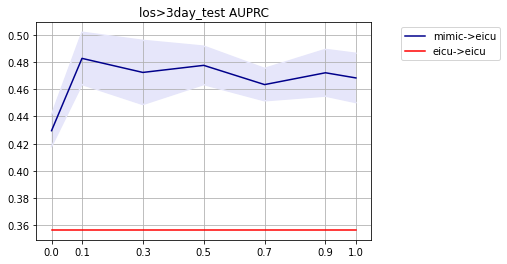

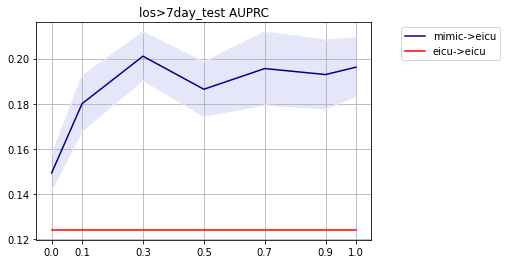

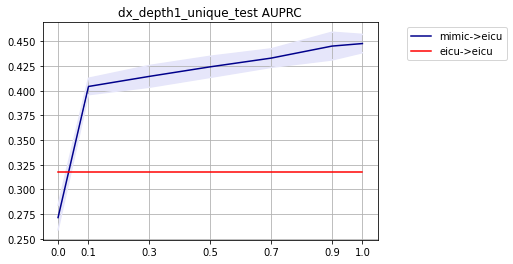

In [6]:
visualize_fewshot(result, 'mimic', 'eicu', 'bio_bert', 'med', True)

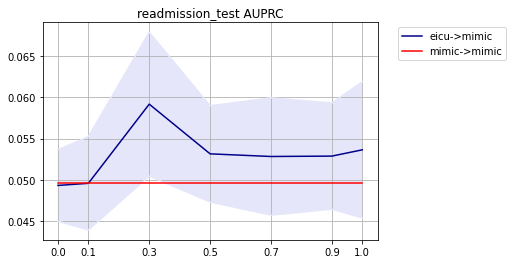

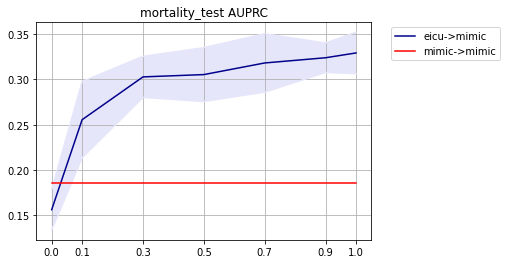

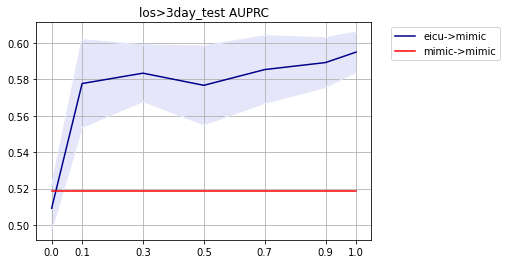

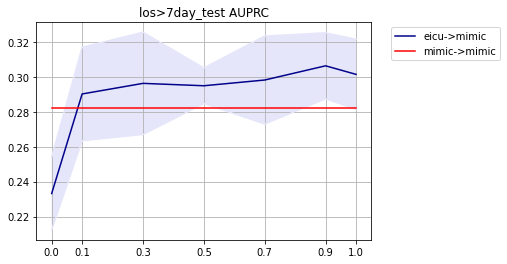

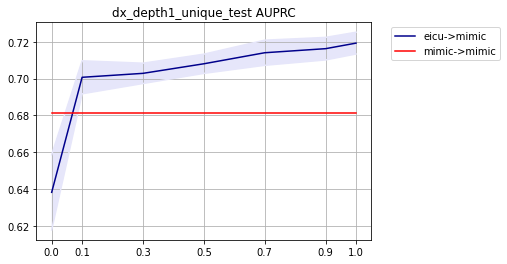

In [7]:
visualize_fewshot(result, 'eicu', 'mimic', 'bio_bert', 'med', True)